# Project 1: Digit Classification with KNN and Naive Bayes

w207: Alex Sewon Kim, 26481817


In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
import statsmodels . api as sm
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


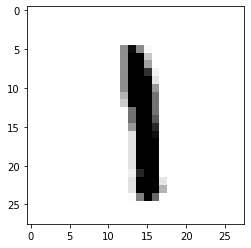

In [3]:
text_x = X[2].reshape(28,28)
plt.figure()
plt.imshow(text_x, cmap=plt.cm.binary)
plt.show()

### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

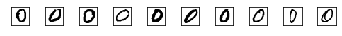

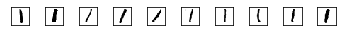

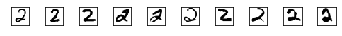

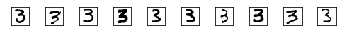

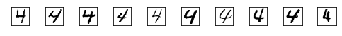

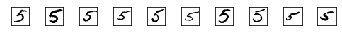

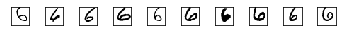

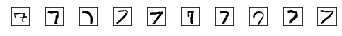

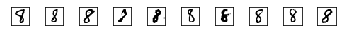

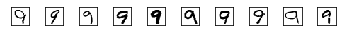

In [4]:
def P1(num_examples=10):

### STUDENT START ###
    plt.figure(figsize=(6,4))
    for i in range(num_examples):
        indicies = np.where(Y == str(i))[0][0:10]
        for j in range(num_examples):
            ind = indicies[j]
            text_x = X[ind].reshape(28,28)
            plt.subplot(10,10,j+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(text_x, cmap=plt.cm.binary)
        plt.show()
                    

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show the performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [5]:
def P2(k_values):

### STUDENT START ###
    for i in k_values:
        neigh = KNeighborsClassifier(n_neighbors = i)
        neigh.fit(mini_train_data, mini_train_labels) 
        predict_dev= neigh.predict(dev_data)
        print("When k = " + str(i) + ":")
        print(classification_report(dev_labels,predict_dev))
        

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

When k = 1:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

When k = 3:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.82      0.98      0.90       118
           2       0.90      0.78      0.84       106


ANSWER: f1- score of 8 is 0.8, which is lowest among other digits. Therefore, 8 is the most difficult digit to predict 

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [6]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for i in train_sizes:
        beg_time = time.time()
        neigh = KNeighborsClassifier(n_neighbors = 1)
        neigh.fit(train_data[:i], train_labels[:i]) 
        accuracy_dev= neigh.score(dev_data,dev_labels)
        end_time = time.time()
        accuracies.append(accuracy_dev)
        print("When size = " + str(i) + ":")
        print(accuracy_dev)
        print("time of operations =" + str(end_time - beg_time))
        

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

When size = 100:
0.702
time of operations =0.169450044631958
When size = 200:
0.791
time of operations =0.26906394958496094
When size = 400:
0.811
time of operations =0.5562078952789307
When size = 800:
0.866
time of operations =1.1605820655822754
When size = 1600:
0.905
time of operations =2.4903359413146973
When size = 3200:
0.927
time of operations =4.333739995956421
When size = 6400:
0.939
time of operations =9.678388118743896
When size = 12800:
0.952
time of operations =20.64340305328369
When size = 25600:
0.963
time of operations =46.22232222557068


In [7]:
print(accuracies)

[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

R_Squared
0.4177006634161019
prediction for 60k 120k 1000k
[1.23617317 1.63742805 7.52249967]


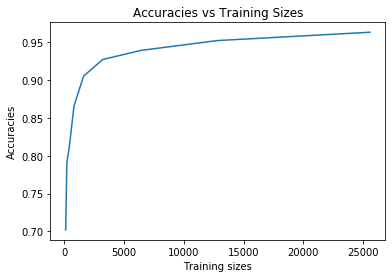

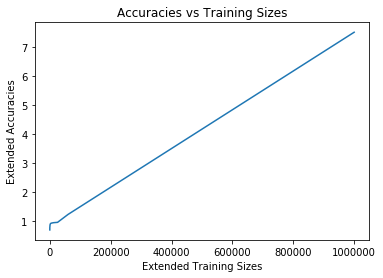

R_Squared
0.8649045423180002
prediction for 60k 120k 1000k
[0.98300883 0.99103472 0.99886915]


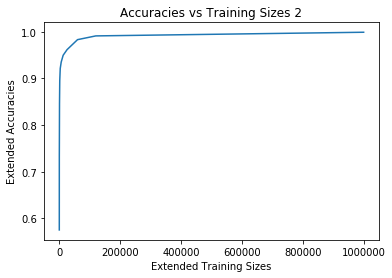

In [8]:
def P4():

### STUDENT START ###
    #conversion to matrix for train_sizes
    array = np.asarray(train_sizes)
    matrix_t = np.reshape((array),(-1,1))
    LR = LinearRegression()
    LR.fit(matrix_t,accuracies)
    R_Squared = LR.score(matrix_t,accuracies)
    
    print("R_Squared")
    print(R_Squared)
    
    #predicted 60k,120k,1000k from trained Linear Regression 
    Extend_predict = LR.predict(np.array([60000,120000,1000000]).reshape(-1,1))
    print("prediction for 60k 120k 1000k")
    print(Extend_predict)
    
    plt.plot(matrix_t,accuracies)
    plt.xlabel("Training sizes")
    plt.ylabel("Accuracies")
    plt.title("Accuracies vs Training Sizes")
    plt.show()
    
    #complete set of accuracies and trainsize
    complete_acc = np.append(accuracies,Extend_predict)
    complete_size = np.append(train_sizes, np.array([60000,120000,1000000]))
    
    #plot
    plt.plot(complete_size,complete_acc)
    plt.xlabel("Extended Training Sizes")
    plt.ylabel("Extended Accuracies")
    plt.title("Accuracies vs Training Sizes")
    plt.show()
    
    #note that accuracies for extend are above 1, we need to adjust the value. 
    #Transformation: Inverse Probability Weighting and run linear regression 
    
    accuracies_w= 1/(1-(np.array(accuracies)))
    LR = LinearRegression()
    LR.fit(matrix_t,accuracies_w)
    
    #R_Squared for new model
    R_Squaredn = LR.score(matrix_t,accuracies_w)
    print("R_Squared")
    print(R_Squaredn)
    
    #predicting 60k,120k,1000k value with new model
    Extend_predict1 = LR.predict(np.array([60000,120000,1000000]).reshape(-1,1))
    complete_accw = np.append(accuracies_w,Extend_predict1)
    
    
    #transform back to original accuracies 
    ncomplete_accw = 1 + (1/(1-complete_accw))
    print("prediction for 60k 120k 1000k")
    print(ncomplete_accw[-3:])
    #plot
    plt.plot(complete_size,ncomplete_accw)
    plt.xlabel("Extended Training Sizes")
    plt.ylabel("Extended Accuracies")
    plt.title("Accuracies vs Training Sizes 2")

  

    
    
### STUDENT END ###

P4()

ANSWER: For the original linear regression model, predicted accuracies are over 1 for 60k,120k,1000k sizes. As sample size get larger, prediction over states the accuracy value which Linear regression is not a optimal model for the case. 

After applying inverse weighting to adjust the values for each accuracies, R squared value went up from 0.41 to 0.86

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Confusion Matrix :
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


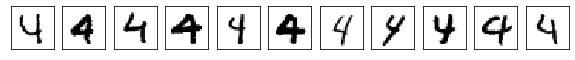

In [9]:
def P5():

### STUDENT START ###
    
    #K=1 nearest neighbor model
    neigh = KNeighborsClassifier(n_neighbors = 1)
    neigh.fit(mini_train_data, mini_train_labels) 
    predict_dev= neigh.predict(dev_data)
    
    #confusion matrix
    confusion_M = confusion_matrix(dev_labels,predict_dev)
    print("Confusion Matrix :")
    print(confusion_M)
    
    #4th row,9th column has highest value (11)
    confused_digits = np.intersect1d(np.where(dev_labels=="4"), np.where(predict_dev=="9"))
    
    #plot the most confused digits
    plt.figure(figsize=(10,10))
    for i in range(len(confused_digits)):
        text_x = dev_data[confused_digits[i]].reshape(28,28)
        plt.subplot(10,11,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(text_x, cmap=plt.cm.binary)
    plt.show()
    
### STUDENT END ###

P5()

ANSWER: looking at the confusion matrix, row 4 and 9th column has 11 which is the max of exisiting value excluding the digonal entries. 4 and 9 are most confused from our module, 4 is classified as 9. 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [10]:
def P6():
    ### STUDENT START ###
        # blurring function 
    
    def G_blur(data):
        
        # matrix with mean 
        kernel = np.array([[1/9,1/9,1/9],
                        [1/9,1/9,1/9],
                        [1/9,1/9,1/9]])

        kernel_y = kernel.shape[0]
        kernel_x = kernel.shape[1]
    
        y = kernel_y//2
        x = kernel_x//2
        
        # creating matrix with filtered images
        filtered_images = []
        for image in data:
             
            img_y = image.shape[0]
            img_x = image.shape[1]
            
            filtered = np.zeros(image.shape)
            for i in range(y, img_y-y):
                for j in range(x, img_x-x):
                    
                    G_blur = 0
                    for m in range(kernel_y):
                        for n in range(kernel_x):
                            G_blur += kernel[m][n]*image[i-y+m][j-x+n]
                            
                    filtered[i][j] = G_blur
            filtered_images.append(filtered)
        return np.asarray(filtered_images)
    
    
    #blur training_set and dev_set
    filtered_mini = G_blur(mini_train_data.reshape(mini_train_data.shape[0],28,28))
    filtered_dev = G_blur(dev_data.reshape(dev_data.shape[0],28, 28))
    
    neigh = KNeighborsClassifier(n_neighbors = 1)
    
    #filtered mini x dev
    neigh_filtered_mini = neigh.fit(filtered_mini.reshape(1000, 784), mini_train_labels)
    prediction_1 = neigh.predict(dev_data)
    print("Accuracy for filtered_mini x dev_data", neigh_filtered_mini.score(dev_data, dev_labels))
   
    #mini x filtered dev
    neigh_mini = neigh.fit(mini_train_data,mini_train_labels)
    prediction_2 = neigh.predict(filtered_dev.reshape(1000, 784))
    print("Accuracy for mini x filtered dev_data", neigh_mini.score(filtered_dev.reshape(1000, 784), dev_labels))


    #Filtered both
    neigh.fit(filtered_mini.reshape(1000,784),mini_train_labels)
    prediction_3 = neigh.predict(filtered_dev.reshape(1000,784))
    print("Accuracy for filtered_mini x filtered dev_Data", neigh_filtered_mini.score(filtered_dev.reshape(1000, 784), dev_labels))
    
    #No filter
    prediction_4 = neigh.fit(mini_train_data, mini_train_labels)
    predicted_dev = neigh.predict(dev_data)
    print("Accuracy for no filters", neigh.score(dev_data, dev_labels))
P6()

Accuracy for filtered_mini x dev_data 0.907
Accuracy for mini x filtered dev_data 0.868
Accuracy for filtered_mini x filtered dev_Data 0.905
Accuracy for no filters 0.884


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [11]:
def P7():

### STUDENT START ###
    
    #transforming mini_train_Data to binary
    binary_mini_train_data = np.where(mini_train_data<(0.5),1,0)
    binary_dev_data = np.where(dev_data<(0.5),1,0)
   
    #Bernoulli model for accuracy
    Bernol = BernoulliNB()
    Bernol.fit(binary_mini_train_data, mini_train_labels)
    b_accuracies= Bernol.score(binary_dev_data,dev_labels)
    print("accuracy for the bernoulli model:", b_accuracies )
    
    #transforming mini_train_Data and dev to 0,1,2 
    new_train_data = np.where(mini_train_data < (1/3),0,mini_train_data)
    new_train_data = np.where((1/3)<=new_train_data.any()<(2/3),1, new_train_data)
    new_train_data = np.where(new_train_data>=(2/3),2,new_train_data)
    
    new_dev_data = np.where(dev_data < (1/3),0,dev_data)
    new_dev_data = np.where((1/3) <= dev_data.any()<(2/3),1, dev_data)
    new_dev_data = np.where(dev_data >=(2/3),2,dev_data)
    
    #multinomial model for accuracy
    multinomial = MultinomialNB()
    multinomial.fit(new_train_data,mini_train_labels)
    multi_accuracies = multinomial.score(new_dev_data, dev_labels)
    print("accuracy for the multinomial model:", multi_accuracies )
    

    
### STUDENT END ###

P7()

accuracy for the bernoulli model: 0.819
accuracy for the multinomial model: 0.818


ANSWER: binary model gives 0.01 higher accuracy than the multinomial model. 2/10 to 3/10 not a huge different. However, binary models are more generalized, it gives slightly better accuracy. 

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [12]:
def P8(alphas):

### STUDENT START ###
   
    #evaluate performance using GridSearchCV
    GSearch = GridSearchCV(estimator = BernoulliNB(), param_grid=alphas, scoring="accuracy", cv=5)
    fit = GSearch.fit(mini_train_data, mini_train_labels)
    Performance = fit.cv_results_["mean_test_score"]
    
    for i in range(9):
        print("Accuracy for alpha=%.10f = " % alphas['alpha'][i], Performance[i])
     
    return fit

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

Accuracy for alpha=0.0000000001 =  0.813
Accuracy for alpha=0.0001000000 =  0.821
Accuracy for alpha=0.0010000000 =  0.825
Accuracy for alpha=0.0100000000 =  0.82
Accuracy for alpha=0.1000000000 =  0.818
Accuracy for alpha=0.5000000000 =  0.816
Accuracy for alpha=1.0000000000 =  0.811
Accuracy for alpha=2.0000000000 =  0.805
Accuracy for alpha=10.0000000000 =  0.781

Best alpha =  {'alpha': 0.001}


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ANSWER: best value for alpha is 0.001 when accuracy is 0.825. When alpha is near 0, accuracy is 0.813. Accuracies vary depending on the alpha values, accuracies decreases reaches two tails of the alpha values both high and low. 

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


performance of Gaussian NB:
0.593
performance of Smooth Gaussian NB
0.821


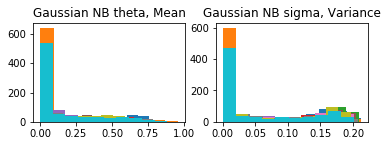

In [13]:
def P9():

### STUDENT END ###
    
    #produce a GaussianNB model and evaluate performance
    Gauss_Naive = GaussianNB()
    G_fit = Gauss_Naive.fit(mini_train_data, mini_train_labels)
    print("performance of Gaussian NB:")
    print(G_fit.score(dev_data , dev_labels))
    
    # theta : mean of each feature per class
    # sigma : variance of each feature per class
    for i in range(10):
        plt.subplot(2,2,1)
        plt.hist(G_fit.theta_[i])
        plt.title('Gaussian NB theta, Mean')
        plt.subplot(2,2,2)
        plt.hist(G_fit.sigma_[i])
        plt.title('Gaussian NB sigma, Variance')
    
    #based on the distribution of the gaussian nb for mean and variance, smooth on 0 < x < 0.1  
    
    G_fit_smooth= GaussianNB(var_smoothing=0.06)
    G_fit2 = G_fit_smooth.fit(mini_train_data, mini_train_labels)
    print("performance of Smooth Gaussian NB")
    print(G_fit2.score(dev_data,dev_labels))
   

### STUDENT END ###

P9()

ANSWER: notice from the histogram and distribution of the mean and variance of the original model. Significant number of sigma lies close on 0,  By applying the var_smoothing from sklearn function close to 0, in our case 0.06, which portion of the largest variance of all features that is added to variances for calculation stability, and accuracy of the model imporve from 0.593 to 0.821. 

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

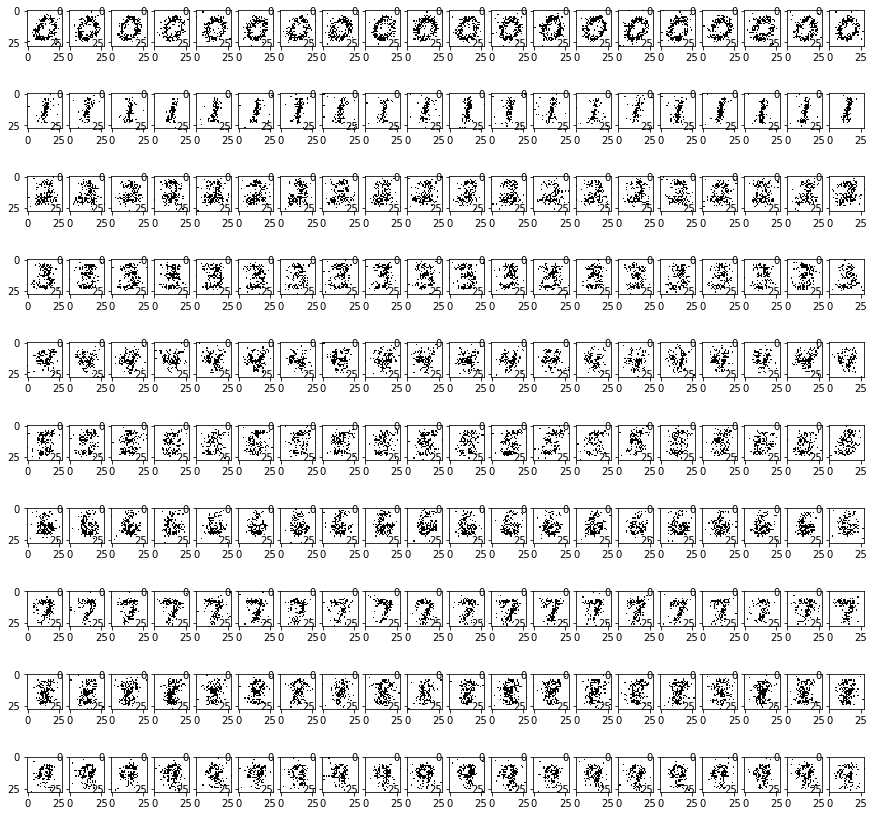

In [14]:
def P10(num_examples):
### STUDENT START ###

    # produce Bernoulli NB model 
    Bernol_NB = BernoulliNB(binarize=0.5)
    Bernol_NB.fit(mini_train_data, mini_train_labels)
    num_10 = 10*num_examples

    # setting up the matrix of each digits and comparing random generation of the digits to probability 
    binary = np.ndarray((num_10, 785))
    for i in range(num_10):
        binary[i,0] = i%10
        binary[i,1:] = [np.random.rand()<np.exp(x) for x in Bernol_NB.feature_log_prob_[i%10]]
        
    # generating subplot of 10x20 grid with 20 examples of digits 
    fig,axes = plt.subplots(10, num_examples, figsize=(15, 15))
    for k in range(10):
        examples = binary[binary[:,0] == k]
        for j in range(num_examples):
            axes[int(k),j].imshow(examples[j,1:].reshape(28, 28),cmap = plt.cm.binary)
            
    plt.show()

### STUDENT END ###

P10(20)

ANSWER:generated digits does have rough-form of training digits. However, each pixes of digets are more dispersed (binary) and hard to recognize in comparison to actual training digits that we have. 

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [15]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    
    # function to partition buckets based on posterior probability 
    def bucket_function(buckets, maxpp):
        if maxpp <= buckets[0]:
            return 0
        else: 
            return bucket_function(buckets[1:], maxpp) + 1
        
    #Bernolli Naive Base model with alpha =1 
    Bernolli_NB = BernoulliNB(binarize=0.5, alpha=1)
    Bernolli_NB.fit(mini_train_data, mini_train_labels)
    prediction_11 = Bernolli_NB.predict(dev_data)
    
    
    for i,j in enumerate(dev_data):
        
        pp = Bernolli_NB.predict_proba(j.reshape(1,784))[0]
        maxpp = np.max(pp)
        
        if prediction_11[bucket_function(buckets, maxpp)] == dev_labels[i]:
            correct[bucket_function(buckets, maxpp)] += 1
            
        total[bucket_function(buckets, maxpp)] += 1
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   1    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  47    accuracy = 0.085
p(pred) is 0.9000000000000 to 0.9990000000000    total = 106    accuracy = 0.047
p(pred) is 0.9990000000000 to 0.9999900000000    total =  75    accuracy = 0.133
p(pred) is 0.9999900000000 to 0.9999999000000    total =  80    accuracy = 0.087
p(pred) is 0.9999999000000 to 0.9999999990000    total =  71    accuracy = 0.070
p(pred) is 0.9999999990000 to 0.9999999999900    total =  74    accuracy = 0.095
p(pred) is 0.9999999999900 to 0.9999999999999    total =  70    accuracy = 0.186
p(pred) is 0.9999999999999 to 1.0000000000000    total = 476    accuracy = 0.032


ANSWER: Higher the posteriror probability, the higher the accuracy it is. also, based on our result above. It is weakly calibrated for the Bernoulli Naive Bayes model. 